In [1]:
""" 
Reading saved data,
once DataFrame is read we modify it -
we change column names, modify time format, and add bus_stop_id 
"""

from Data_reading.reading import give_modified_bus_stops_df
from Data_reading.reading import give_modified_lines_stops_df
from Data_reading.reading import give_modified_curr_positions_df
from Data_reading.reading import give_modified_time_tables_df

def give_data(funct_to_get):
    early_data = funct_to_get()
    late_data = funct_to_get(late_hours = False)
    return [early_data, late_data]

bus_stops_dfs = give_data(give_modified_bus_stops_df)
lines_stops_dfs = give_data(give_modified_lines_stops_df)
positions_dfs = give_data(give_modified_curr_positions_df)
time_tables_dfs = give_data(give_modified_time_tables_df)

c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value])
c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value])


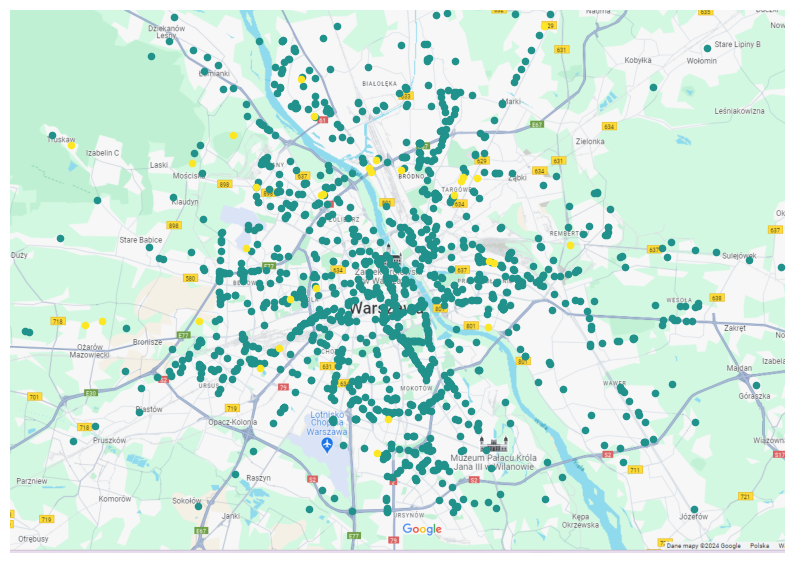

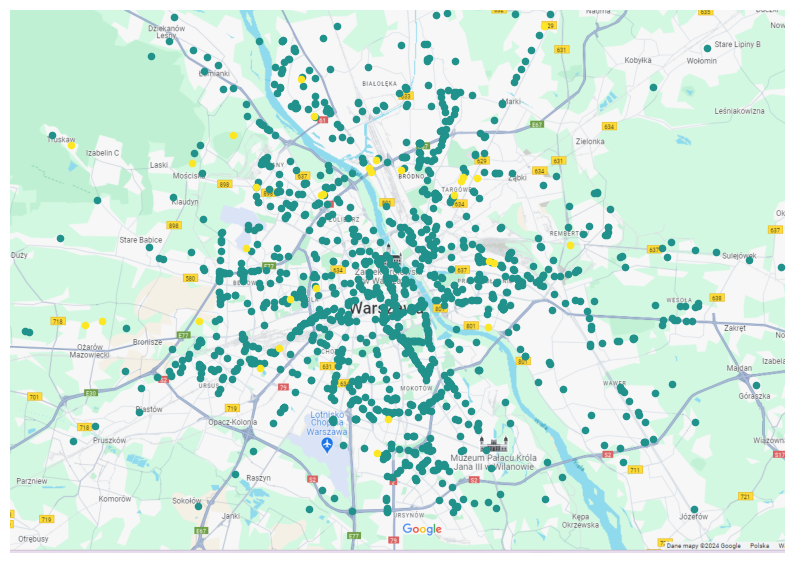

In [9]:
""" 
Here we are plotting on map two kinds of measurements:
1. buses which have speed over 50 km / h
2. the rest
(we are not considering buses over 90 km / h)
"""

from Speed.speed import give_data_with_allowed_and_not_allowed_speed
from Helpers.visualization import plot_points_on_map

speed_data_early = speed.give_data_with_allowed_and_not_allowed_speed(positions_dfs[0])
speed_data_late = speed.give_data_with_allowed_and_not_allowed_speed(positions_dfs[1])

plot_points_on_map(speed_data_early)
plot_points_on_map(speed_data_late)

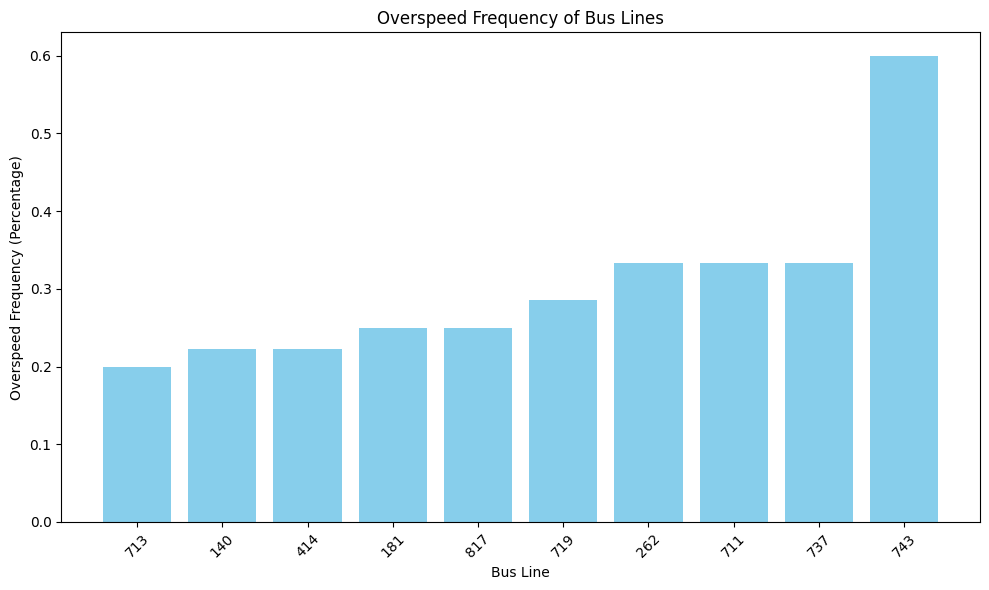

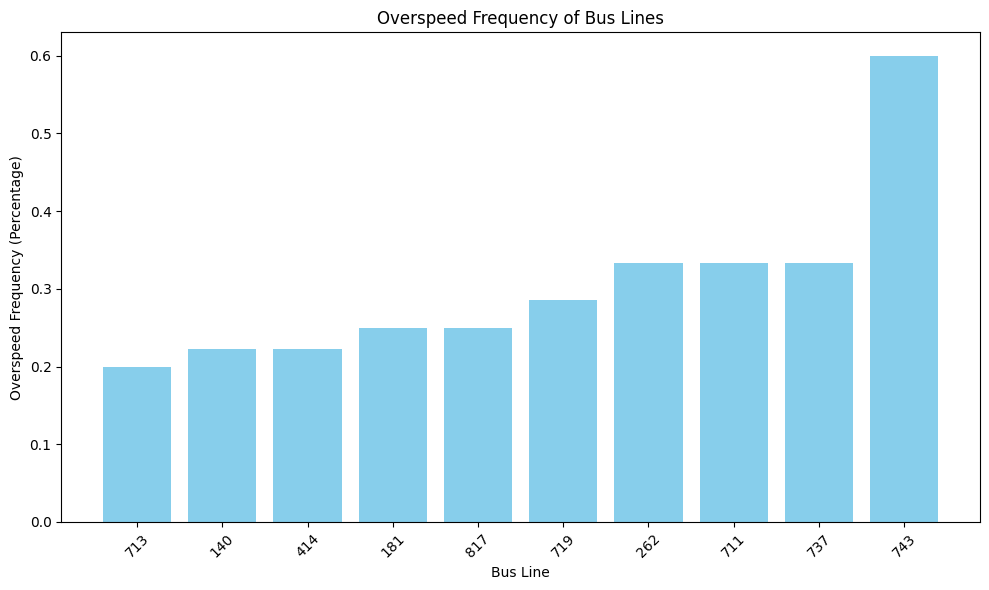

In [4]:
""" 
Now we can check for 10 fastest lines and plot them
(just for fun)
"""
from Helpers.visualization import visualize_overspeed_percentage_within_line

HOW_MANY_FAST_LINES  = 10
fast_lines_early = speed.give_lines_with_most_frequent_overspeed(positions_dfs[0], 
                                                                how_many = HOW_MANY_FAST_LINES)
fast_lines_late = speed.give_lines_with_most_frequent_overspeed(positions_dfs[1], 
                                                                how_many = HOW_MANY_FAST_LINES)
    
visualize_overspeed_percentage_within_line(fast_lines_early)
visualize_overspeed_percentage_within_line(fast_lines_late)
    


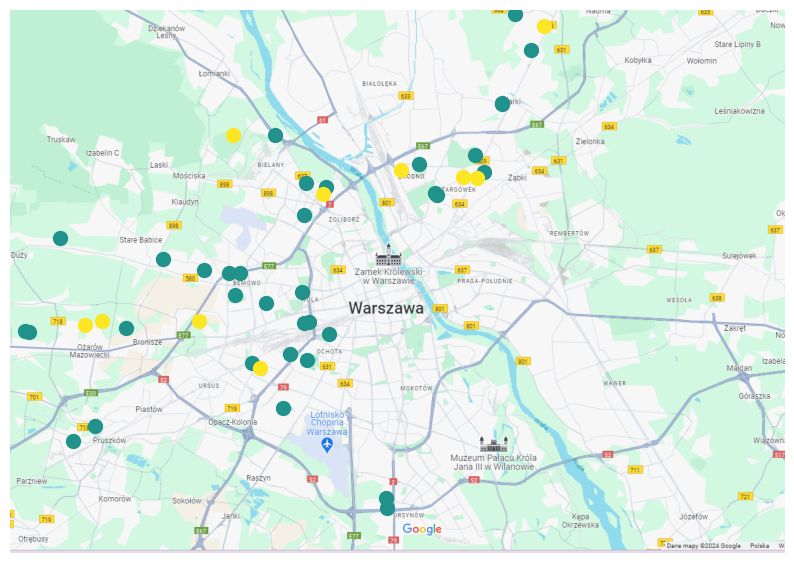

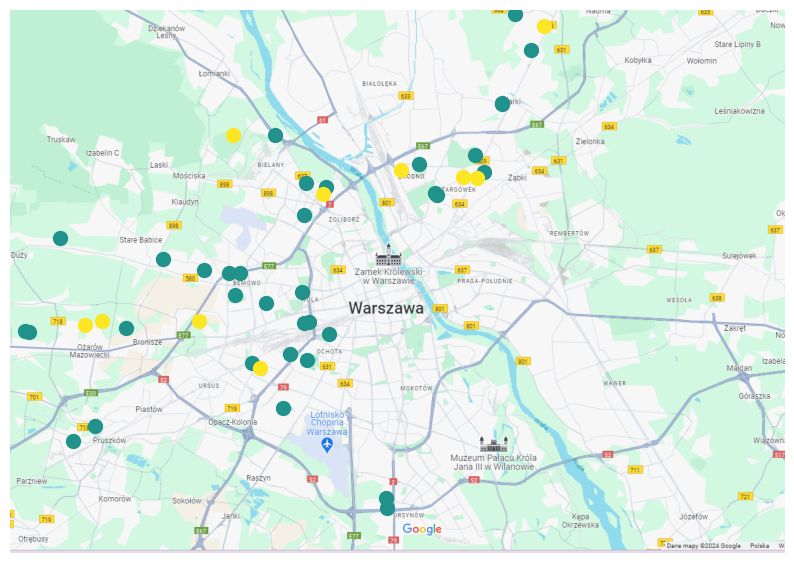

In [5]:
from Data_reading.modifying_dfs import Aliases as als

def plot_fast_lines(fast_lines, positions_df):
    num_of_fast_lines = [x[0] for x in fast_lines]
    pos_of_fast_lines = positions_df[positions_df[als.LINE.value].isin(num_of_fast_lines)] 

    speed_data = speed.give_data_with_allowed_and_not_allowed_speed(pos_of_fast_lines)
    plot_points_on_map(speed_data, dot_size = 100)
    
plot_fast_lines(fast_lines_early, positions_dfs[0])
plot_fast_lines(fast_lines_late, positions_dfs[1])

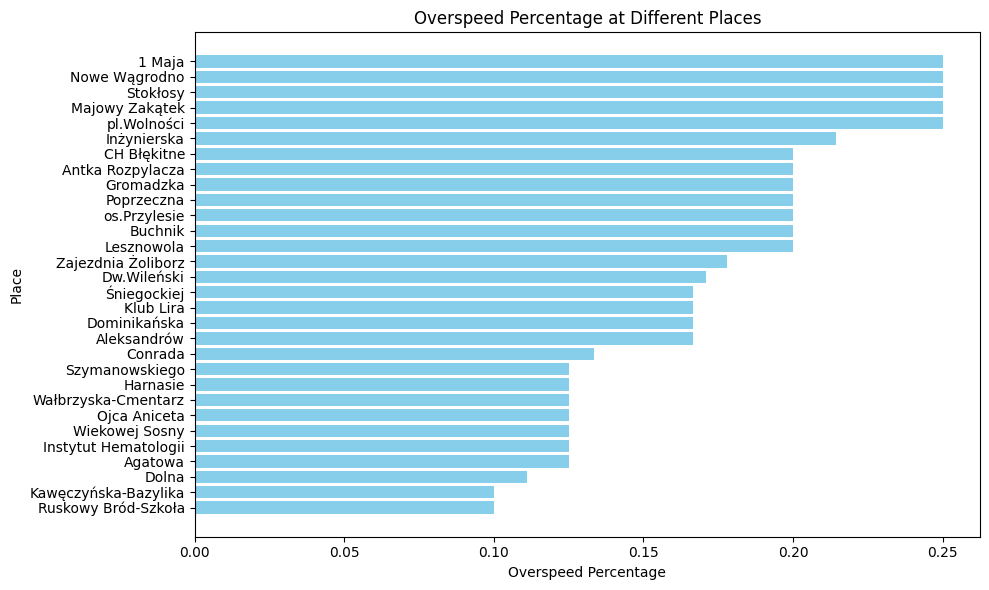

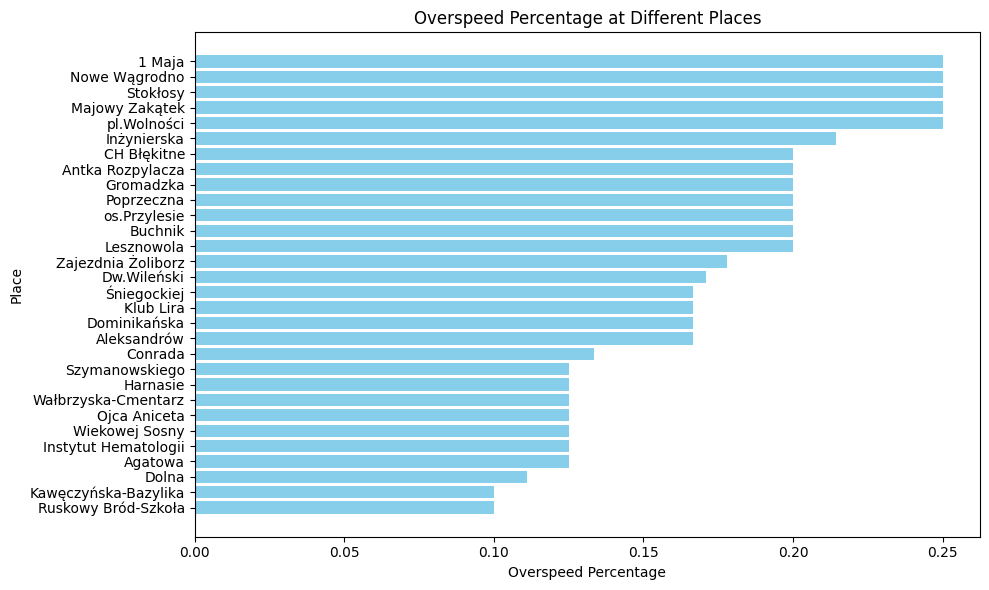

In [9]:
""" 
Now we are going to plot places around which 
overspeed was very frequent
"""

from Speed.speed import give_dataframe_of_coords_with_line_and_speed
from Speed.fast_localizations import give_fastest_places
from Helpers.visualization import visualize_overspeed_in_places

HOW_MANY = 30

speed_with_coords_early = give_dataframe_of_coords_with_line_and_speed(positions_dfs[0])
speed_with_coords_late = give_dataframe_of_coords_with_line_and_speed(positions_dfs[1])

fastest_places_early = give_fastest_places(bus_stops_dfs[0], speed_with_coords_early, how_many = HOW_MANY)
fastest_places_late = give_fastest_places(bus_stops_dfs[1], speed_with_coords_late, how_many = HOW_MANY)

visualize_overspeed_in_places(fastest_places_early)
visualize_overspeed_in_places(fastest_places_late)


In [ ]:
from fast_localizations import give_coords_of_fastes_localizations

fastest_places_coords_data_early = give_places_coords_to_plot_on_map(fastest_places_early,
                                                                     bus_stop_dfs[0])
fastest_places_coords_data_late = give_places_coords_to_plot_on_map(fastest_places_late,
                                                                     bus_stop_dfs[0])

plot_points_on_map(fastest_places_coords_data_early)
plot_points_on_map(fastest_places_coords_data_late)